In [268]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import scipy

In [269]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Slices/20190526_slices/201910/ncan/' #master folder
protein="TNR" #TNR,Agg,WFA,HABP

In [317]:
results = {"filename":[],
          "exp condition":[],
          "ecmchannelno":[]
          }
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if ("save" in str(filelist[i]))==True:
            if filelist[i].endswith(".tif"): 
                if str(filelist[i][:-12]) not in str(results["filename"]):

                    results["filename"].append(filelist[i][:-15])
                    results["exp condition"].append(filelist[i][:-15].split('/')[-3])
                    #channeldir="/".join(filelist[i][:-12].split("/")[:-2])
                    #exec(open(channeldir+"/channels.txt").read())
                    results["ecmchannelno"].append(1)



In [331]:
results["TNR spots mask"]=[]
for i in range(0,len(results["filename"])):
    results["TNR spots mask"].append(np.nan)
for mask in range(0,len(results["filename"])):
    ecm_channel_no=results["ecmchannelno"][mask]
    file_nametnr=results["filename"][mask]+'.roi.binary.tif'

    tnrmask=cv2.imread(file_nametnr)
    results["TNR spots mask"][mask]=tnrmask


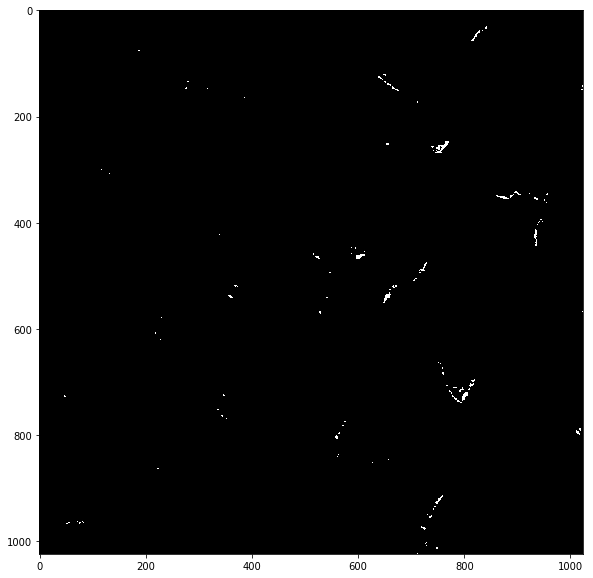

In [332]:
plt.figure(figsize=(10,10))
plt.imshow(results["TNR spots mask"][20])



## get icy spots

In [340]:
## make spots dictionaries
ecm_spots_results={"filename":[],
               "exp condition":[],
               "spotno":[],
                   "centroid":[],
                   "weighted centroid":[],
                   "size":[],
                   "mean_intensity":[],
               "distance to nearest centroid":[],
                   "distance to nearest weighted centroid":[],
                   "perimeter":[]
                 
                  }

for image in range(0,len(results["filename"])):
    print('Calculating image no ' + str(image+1) + ' out of' + str(len(results["filename"])))
    #read masks
    original_image_name=results["filename"][0].split('save')[0]+results["filename"][0].split('/')[-1]
    original_image=pims.open(original_image_name)[0]
    ecm_image=results["TNR spots mask"][image][:,:,0]
    #label masks
    labeled_ecm=label(ecm_image)
    #props
    regionprops_ecm=regionprops(labeled_ecm,intensity_image=original_image)
    #get params from props
    for i in range(0,len(regionprops_ecm)):
        ecm_spots_results["filename"].append(results["filename"][image])
        ecm_spots_results["exp condition"].append(results["exp condition"][image])
        ecm_spots_results["spotno"].append(i)
        ecm_spots_results["centroid"].append(regionprops_ecm[i]['centroid'])
        ecm_spots_results["weighted centroid"].append(regionprops_ecm[i]['weighted_centroid'])
        ecm_spots_results["size"].append(regionprops_ecm[i]['area'])
        ecm_spots_results["mean_intensity"].append(regionprops_ecm[i]['mean_intensity'])
        ecm_spots_results["perimeter"].append(regionprops_ecm[i]['perimeter'])
        

TiffPages: invalid page offset (1058616)


Calculating image no 1 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 2 out of42
Calculating image no 3 out of42
Calculating image no 4 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 5 out of42
Calculating image no 6 out of42
Calculating image no 7 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 8 out of42
Calculating image no 9 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 10 out of42
Calculating image no 11 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 12 out of42
Calculating image no 13 out of42
Calculating image no 14 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 15 out of42
Calculating image no 16 out of42
Calculating image no 17 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 18 out of42
Calculating image no 19 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 20 out of42
Calculating image no 21 out of42
Calculating image no 22 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 23 out of42
Calculating image no 24 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 25 out of42
Calculating image no 26 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 27 out of42
Calculating image no 28 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 29 out of42
Calculating image no 30 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 31 out of42
Calculating image no 32 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 33 out of42
Calculating image no 34 out of42
Calculating image no 35 out of42


TiffPages: invalid page offset (1058616)


Calculating image no 36 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 37 out of42
Calculating image no 38 out of42


TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)
TiffPages: invalid page offset (1058616)


Calculating image no 39 out of42
Calculating image no 40 out of42
Calculating image no 41 out of42


TiffPages: invalid page offset (1058616)


Calculating image no 42 out of42


In [341]:
ecm_spots_results_todf=deepcopy(ecm_spots_results)
#del(ecm_spots_results["distance to nearest centroid"])

#ecm_spots_results["distance to nearest centroid"]=[]
#df_ecmspots=pd.DataFrame(ecm_spots_results_todf)

for i in range(0,len(ecm_spots_results["filename"])):
    image_id=ecm_spots_results["filename"][i]
    #funcat_slice=df_funcatspots[df_funcatspots["filename"]==image_id]
    print(str(i+1)+' out of ' + str(len(ecm_spots_results["filename"])))
    a=scipy.spatial.distance.cdist([ecm_spots_results["centroid"][i]],
                                         ecm_spots_results["centroid"],'euclidean')[0]
    minval = np.min(a[np.nonzero(a)])
    ecm_spots_results["distance to nearest centroid"].append(minval)
    
    a=scipy.spatial.distance.cdist([ecm_spots_results["weighted centroid"][i]],
                                         ecm_spots_results["weighted centroid"],'euclidean')[0]
    minval = np.min(a[np.nonzero(a)])
    ecm_spots_results["distance to nearest weighted centroid"].append(minval)

    


1 out of 10268
2 out of 10268
3 out of 10268
4 out of 10268
5 out of 10268
6 out of 10268
7 out of 10268
8 out of 10268
9 out of 10268
10 out of 10268
11 out of 10268
12 out of 10268
13 out of 10268
14 out of 10268
15 out of 10268
16 out of 10268
17 out of 10268
18 out of 10268
19 out of 10268
20 out of 10268
21 out of 10268
22 out of 10268
23 out of 10268
24 out of 10268
25 out of 10268
26 out of 10268
27 out of 10268
28 out of 10268
29 out of 10268
30 out of 10268
31 out of 10268
32 out of 10268
33 out of 10268
34 out of 10268
35 out of 10268
36 out of 10268
37 out of 10268
38 out of 10268
39 out of 10268
40 out of 10268
41 out of 10268
42 out of 10268
43 out of 10268
44 out of 10268
45 out of 10268
46 out of 10268
47 out of 10268
48 out of 10268
49 out of 10268
50 out of 10268
51 out of 10268
52 out of 10268
53 out of 10268
54 out of 10268
55 out of 10268
56 out of 10268
57 out of 10268
58 out of 10268
59 out of 10268
60 out of 10268
61 out of 10268
62 out of 10268
63 out of 10268
6

499 out of 10268
500 out of 10268
501 out of 10268
502 out of 10268
503 out of 10268
504 out of 10268
505 out of 10268
506 out of 10268
507 out of 10268
508 out of 10268
509 out of 10268
510 out of 10268
511 out of 10268
512 out of 10268
513 out of 10268
514 out of 10268
515 out of 10268
516 out of 10268
517 out of 10268
518 out of 10268
519 out of 10268
520 out of 10268
521 out of 10268
522 out of 10268
523 out of 10268
524 out of 10268
525 out of 10268
526 out of 10268
527 out of 10268
528 out of 10268
529 out of 10268
530 out of 10268
531 out of 10268
532 out of 10268
533 out of 10268
534 out of 10268
535 out of 10268
536 out of 10268
537 out of 10268
538 out of 10268
539 out of 10268
540 out of 10268
541 out of 10268
542 out of 10268
543 out of 10268
544 out of 10268
545 out of 10268
546 out of 10268
547 out of 10268
548 out of 10268
549 out of 10268
550 out of 10268
551 out of 10268
552 out of 10268
553 out of 10268
554 out of 10268
555 out of 10268
556 out of 10268
557 out of 102

981 out of 10268
982 out of 10268
983 out of 10268
984 out of 10268
985 out of 10268
986 out of 10268
987 out of 10268
988 out of 10268
989 out of 10268
990 out of 10268
991 out of 10268
992 out of 10268
993 out of 10268
994 out of 10268
995 out of 10268
996 out of 10268
997 out of 10268
998 out of 10268
999 out of 10268
1000 out of 10268
1001 out of 10268
1002 out of 10268
1003 out of 10268
1004 out of 10268
1005 out of 10268
1006 out of 10268
1007 out of 10268
1008 out of 10268
1009 out of 10268
1010 out of 10268
1011 out of 10268
1012 out of 10268
1013 out of 10268
1014 out of 10268
1015 out of 10268
1016 out of 10268
1017 out of 10268
1018 out of 10268
1019 out of 10268
1020 out of 10268
1021 out of 10268
1022 out of 10268
1023 out of 10268
1024 out of 10268
1025 out of 10268
1026 out of 10268
1027 out of 10268
1028 out of 10268
1029 out of 10268
1030 out of 10268
1031 out of 10268
1032 out of 10268
1033 out of 10268
1034 out of 10268
1035 out of 10268
1036 out of 10268
1037 out of

1448 out of 10268
1449 out of 10268
1450 out of 10268
1451 out of 10268
1452 out of 10268
1453 out of 10268
1454 out of 10268
1455 out of 10268
1456 out of 10268
1457 out of 10268
1458 out of 10268
1459 out of 10268
1460 out of 10268
1461 out of 10268
1462 out of 10268
1463 out of 10268
1464 out of 10268
1465 out of 10268
1466 out of 10268
1467 out of 10268
1468 out of 10268
1469 out of 10268
1470 out of 10268
1471 out of 10268
1472 out of 10268
1473 out of 10268
1474 out of 10268
1475 out of 10268
1476 out of 10268
1477 out of 10268
1478 out of 10268
1479 out of 10268
1480 out of 10268
1481 out of 10268
1482 out of 10268
1483 out of 10268
1484 out of 10268
1485 out of 10268
1486 out of 10268
1487 out of 10268
1488 out of 10268
1489 out of 10268
1490 out of 10268
1491 out of 10268
1492 out of 10268
1493 out of 10268
1494 out of 10268
1495 out of 10268
1496 out of 10268
1497 out of 10268
1498 out of 10268
1499 out of 10268
1500 out of 10268
1501 out of 10268
1502 out of 10268
1503 out o

1917 out of 10268
1918 out of 10268
1919 out of 10268
1920 out of 10268
1921 out of 10268
1922 out of 10268
1923 out of 10268
1924 out of 10268
1925 out of 10268
1926 out of 10268
1927 out of 10268
1928 out of 10268
1929 out of 10268
1930 out of 10268
1931 out of 10268
1932 out of 10268
1933 out of 10268
1934 out of 10268
1935 out of 10268
1936 out of 10268
1937 out of 10268
1938 out of 10268
1939 out of 10268
1940 out of 10268
1941 out of 10268
1942 out of 10268
1943 out of 10268
1944 out of 10268
1945 out of 10268
1946 out of 10268
1947 out of 10268
1948 out of 10268
1949 out of 10268
1950 out of 10268
1951 out of 10268
1952 out of 10268
1953 out of 10268
1954 out of 10268
1955 out of 10268
1956 out of 10268
1957 out of 10268
1958 out of 10268
1959 out of 10268
1960 out of 10268
1961 out of 10268
1962 out of 10268
1963 out of 10268
1964 out of 10268
1965 out of 10268
1966 out of 10268
1967 out of 10268
1968 out of 10268
1969 out of 10268
1970 out of 10268
1971 out of 10268
1972 out o

2375 out of 10268
2376 out of 10268
2377 out of 10268
2378 out of 10268
2379 out of 10268
2380 out of 10268
2381 out of 10268
2382 out of 10268
2383 out of 10268
2384 out of 10268
2385 out of 10268
2386 out of 10268
2387 out of 10268
2388 out of 10268
2389 out of 10268
2390 out of 10268
2391 out of 10268
2392 out of 10268
2393 out of 10268
2394 out of 10268
2395 out of 10268
2396 out of 10268
2397 out of 10268
2398 out of 10268
2399 out of 10268
2400 out of 10268
2401 out of 10268
2402 out of 10268
2403 out of 10268
2404 out of 10268
2405 out of 10268
2406 out of 10268
2407 out of 10268
2408 out of 10268
2409 out of 10268
2410 out of 10268
2411 out of 10268
2412 out of 10268
2413 out of 10268
2414 out of 10268
2415 out of 10268
2416 out of 10268
2417 out of 10268
2418 out of 10268
2419 out of 10268
2420 out of 10268
2421 out of 10268
2422 out of 10268
2423 out of 10268
2424 out of 10268
2425 out of 10268
2426 out of 10268
2427 out of 10268
2428 out of 10268
2429 out of 10268
2430 out o

2844 out of 10268
2845 out of 10268
2846 out of 10268
2847 out of 10268
2848 out of 10268
2849 out of 10268
2850 out of 10268
2851 out of 10268
2852 out of 10268
2853 out of 10268
2854 out of 10268
2855 out of 10268
2856 out of 10268
2857 out of 10268
2858 out of 10268
2859 out of 10268
2860 out of 10268
2861 out of 10268
2862 out of 10268
2863 out of 10268
2864 out of 10268
2865 out of 10268
2866 out of 10268
2867 out of 10268
2868 out of 10268
2869 out of 10268
2870 out of 10268
2871 out of 10268
2872 out of 10268
2873 out of 10268
2874 out of 10268
2875 out of 10268
2876 out of 10268
2877 out of 10268
2878 out of 10268
2879 out of 10268
2880 out of 10268
2881 out of 10268
2882 out of 10268
2883 out of 10268
2884 out of 10268
2885 out of 10268
2886 out of 10268
2887 out of 10268
2888 out of 10268
2889 out of 10268
2890 out of 10268
2891 out of 10268
2892 out of 10268
2893 out of 10268
2894 out of 10268
2895 out of 10268
2896 out of 10268
2897 out of 10268
2898 out of 10268
2899 out o

3308 out of 10268
3309 out of 10268
3310 out of 10268
3311 out of 10268
3312 out of 10268
3313 out of 10268
3314 out of 10268
3315 out of 10268
3316 out of 10268
3317 out of 10268
3318 out of 10268
3319 out of 10268
3320 out of 10268
3321 out of 10268
3322 out of 10268
3323 out of 10268
3324 out of 10268
3325 out of 10268
3326 out of 10268
3327 out of 10268
3328 out of 10268
3329 out of 10268
3330 out of 10268
3331 out of 10268
3332 out of 10268
3333 out of 10268
3334 out of 10268
3335 out of 10268
3336 out of 10268
3337 out of 10268
3338 out of 10268
3339 out of 10268
3340 out of 10268
3341 out of 10268
3342 out of 10268
3343 out of 10268
3344 out of 10268
3345 out of 10268
3346 out of 10268
3347 out of 10268
3348 out of 10268
3349 out of 10268
3350 out of 10268
3351 out of 10268
3352 out of 10268
3353 out of 10268
3354 out of 10268
3355 out of 10268
3356 out of 10268
3357 out of 10268
3358 out of 10268
3359 out of 10268
3360 out of 10268
3361 out of 10268
3362 out of 10268
3363 out o

3777 out of 10268
3778 out of 10268
3779 out of 10268
3780 out of 10268
3781 out of 10268
3782 out of 10268
3783 out of 10268
3784 out of 10268
3785 out of 10268
3786 out of 10268
3787 out of 10268
3788 out of 10268
3789 out of 10268
3790 out of 10268
3791 out of 10268
3792 out of 10268
3793 out of 10268
3794 out of 10268
3795 out of 10268
3796 out of 10268
3797 out of 10268
3798 out of 10268
3799 out of 10268
3800 out of 10268
3801 out of 10268
3802 out of 10268
3803 out of 10268
3804 out of 10268
3805 out of 10268
3806 out of 10268
3807 out of 10268
3808 out of 10268
3809 out of 10268
3810 out of 10268
3811 out of 10268
3812 out of 10268
3813 out of 10268
3814 out of 10268
3815 out of 10268
3816 out of 10268
3817 out of 10268
3818 out of 10268
3819 out of 10268
3820 out of 10268
3821 out of 10268
3822 out of 10268
3823 out of 10268
3824 out of 10268
3825 out of 10268
3826 out of 10268
3827 out of 10268
3828 out of 10268
3829 out of 10268
3830 out of 10268
3831 out of 10268
3832 out o

4244 out of 10268
4245 out of 10268
4246 out of 10268
4247 out of 10268
4248 out of 10268
4249 out of 10268
4250 out of 10268
4251 out of 10268
4252 out of 10268
4253 out of 10268
4254 out of 10268
4255 out of 10268
4256 out of 10268
4257 out of 10268
4258 out of 10268
4259 out of 10268
4260 out of 10268
4261 out of 10268
4262 out of 10268
4263 out of 10268
4264 out of 10268
4265 out of 10268
4266 out of 10268
4267 out of 10268
4268 out of 10268
4269 out of 10268
4270 out of 10268
4271 out of 10268
4272 out of 10268
4273 out of 10268
4274 out of 10268
4275 out of 10268
4276 out of 10268
4277 out of 10268
4278 out of 10268
4279 out of 10268
4280 out of 10268
4281 out of 10268
4282 out of 10268
4283 out of 10268
4284 out of 10268
4285 out of 10268
4286 out of 10268
4287 out of 10268
4288 out of 10268
4289 out of 10268
4290 out of 10268
4291 out of 10268
4292 out of 10268
4293 out of 10268
4294 out of 10268
4295 out of 10268
4296 out of 10268
4297 out of 10268
4298 out of 10268
4299 out o

4710 out of 10268
4711 out of 10268
4712 out of 10268
4713 out of 10268
4714 out of 10268
4715 out of 10268
4716 out of 10268
4717 out of 10268
4718 out of 10268
4719 out of 10268
4720 out of 10268
4721 out of 10268
4722 out of 10268
4723 out of 10268
4724 out of 10268
4725 out of 10268
4726 out of 10268
4727 out of 10268
4728 out of 10268
4729 out of 10268
4730 out of 10268
4731 out of 10268
4732 out of 10268
4733 out of 10268
4734 out of 10268
4735 out of 10268
4736 out of 10268
4737 out of 10268
4738 out of 10268
4739 out of 10268
4740 out of 10268
4741 out of 10268
4742 out of 10268
4743 out of 10268
4744 out of 10268
4745 out of 10268
4746 out of 10268
4747 out of 10268
4748 out of 10268
4749 out of 10268
4750 out of 10268
4751 out of 10268
4752 out of 10268
4753 out of 10268
4754 out of 10268
4755 out of 10268
4756 out of 10268
4757 out of 10268
4758 out of 10268
4759 out of 10268
4760 out of 10268
4761 out of 10268
4762 out of 10268
4763 out of 10268
4764 out of 10268
4765 out o

5171 out of 10268
5172 out of 10268
5173 out of 10268
5174 out of 10268
5175 out of 10268
5176 out of 10268
5177 out of 10268
5178 out of 10268
5179 out of 10268
5180 out of 10268
5181 out of 10268
5182 out of 10268
5183 out of 10268
5184 out of 10268
5185 out of 10268
5186 out of 10268
5187 out of 10268
5188 out of 10268
5189 out of 10268
5190 out of 10268
5191 out of 10268
5192 out of 10268
5193 out of 10268
5194 out of 10268
5195 out of 10268
5196 out of 10268
5197 out of 10268
5198 out of 10268
5199 out of 10268
5200 out of 10268
5201 out of 10268
5202 out of 10268
5203 out of 10268
5204 out of 10268
5205 out of 10268
5206 out of 10268
5207 out of 10268
5208 out of 10268
5209 out of 10268
5210 out of 10268
5211 out of 10268
5212 out of 10268
5213 out of 10268
5214 out of 10268
5215 out of 10268
5216 out of 10268
5217 out of 10268
5218 out of 10268
5219 out of 10268
5220 out of 10268
5221 out of 10268
5222 out of 10268
5223 out of 10268
5224 out of 10268
5225 out of 10268
5226 out o

5635 out of 10268
5636 out of 10268
5637 out of 10268
5638 out of 10268
5639 out of 10268
5640 out of 10268
5641 out of 10268
5642 out of 10268
5643 out of 10268
5644 out of 10268
5645 out of 10268
5646 out of 10268
5647 out of 10268
5648 out of 10268
5649 out of 10268
5650 out of 10268
5651 out of 10268
5652 out of 10268
5653 out of 10268
5654 out of 10268
5655 out of 10268
5656 out of 10268
5657 out of 10268
5658 out of 10268
5659 out of 10268
5660 out of 10268
5661 out of 10268
5662 out of 10268
5663 out of 10268
5664 out of 10268
5665 out of 10268
5666 out of 10268
5667 out of 10268
5668 out of 10268
5669 out of 10268
5670 out of 10268
5671 out of 10268
5672 out of 10268
5673 out of 10268
5674 out of 10268
5675 out of 10268
5676 out of 10268
5677 out of 10268
5678 out of 10268
5679 out of 10268
5680 out of 10268
5681 out of 10268
5682 out of 10268
5683 out of 10268
5684 out of 10268
5685 out of 10268
5686 out of 10268
5687 out of 10268
5688 out of 10268
5689 out of 10268
5690 out o

6091 out of 10268
6092 out of 10268
6093 out of 10268
6094 out of 10268
6095 out of 10268
6096 out of 10268
6097 out of 10268
6098 out of 10268
6099 out of 10268
6100 out of 10268
6101 out of 10268
6102 out of 10268
6103 out of 10268
6104 out of 10268
6105 out of 10268
6106 out of 10268
6107 out of 10268
6108 out of 10268
6109 out of 10268
6110 out of 10268
6111 out of 10268
6112 out of 10268
6113 out of 10268
6114 out of 10268
6115 out of 10268
6116 out of 10268
6117 out of 10268
6118 out of 10268
6119 out of 10268
6120 out of 10268
6121 out of 10268
6122 out of 10268
6123 out of 10268
6124 out of 10268
6125 out of 10268
6126 out of 10268
6127 out of 10268
6128 out of 10268
6129 out of 10268
6130 out of 10268
6131 out of 10268
6132 out of 10268
6133 out of 10268
6134 out of 10268
6135 out of 10268
6136 out of 10268
6137 out of 10268
6138 out of 10268
6139 out of 10268
6140 out of 10268
6141 out of 10268
6142 out of 10268
6143 out of 10268
6144 out of 10268
6145 out of 10268
6146 out o

6558 out of 10268
6559 out of 10268
6560 out of 10268
6561 out of 10268
6562 out of 10268
6563 out of 10268
6564 out of 10268
6565 out of 10268
6566 out of 10268
6567 out of 10268
6568 out of 10268
6569 out of 10268
6570 out of 10268
6571 out of 10268
6572 out of 10268
6573 out of 10268
6574 out of 10268
6575 out of 10268
6576 out of 10268
6577 out of 10268
6578 out of 10268
6579 out of 10268
6580 out of 10268
6581 out of 10268
6582 out of 10268
6583 out of 10268
6584 out of 10268
6585 out of 10268
6586 out of 10268
6587 out of 10268
6588 out of 10268
6589 out of 10268
6590 out of 10268
6591 out of 10268
6592 out of 10268
6593 out of 10268
6594 out of 10268
6595 out of 10268
6596 out of 10268
6597 out of 10268
6598 out of 10268
6599 out of 10268
6600 out of 10268
6601 out of 10268
6602 out of 10268
6603 out of 10268
6604 out of 10268
6605 out of 10268
6606 out of 10268
6607 out of 10268
6608 out of 10268
6609 out of 10268
6610 out of 10268
6611 out of 10268
6612 out of 10268
6613 out o

7021 out of 10268
7022 out of 10268
7023 out of 10268
7024 out of 10268
7025 out of 10268
7026 out of 10268
7027 out of 10268
7028 out of 10268
7029 out of 10268
7030 out of 10268
7031 out of 10268
7032 out of 10268
7033 out of 10268
7034 out of 10268
7035 out of 10268
7036 out of 10268
7037 out of 10268
7038 out of 10268
7039 out of 10268
7040 out of 10268
7041 out of 10268
7042 out of 10268
7043 out of 10268
7044 out of 10268
7045 out of 10268
7046 out of 10268
7047 out of 10268
7048 out of 10268
7049 out of 10268
7050 out of 10268
7051 out of 10268
7052 out of 10268
7053 out of 10268
7054 out of 10268
7055 out of 10268
7056 out of 10268
7057 out of 10268
7058 out of 10268
7059 out of 10268
7060 out of 10268
7061 out of 10268
7062 out of 10268
7063 out of 10268
7064 out of 10268
7065 out of 10268
7066 out of 10268
7067 out of 10268
7068 out of 10268
7069 out of 10268
7070 out of 10268
7071 out of 10268
7072 out of 10268
7073 out of 10268
7074 out of 10268
7075 out of 10268
7076 out o

7485 out of 10268
7486 out of 10268
7487 out of 10268
7488 out of 10268
7489 out of 10268
7490 out of 10268
7491 out of 10268
7492 out of 10268
7493 out of 10268
7494 out of 10268
7495 out of 10268
7496 out of 10268
7497 out of 10268
7498 out of 10268
7499 out of 10268
7500 out of 10268
7501 out of 10268
7502 out of 10268
7503 out of 10268
7504 out of 10268
7505 out of 10268
7506 out of 10268
7507 out of 10268
7508 out of 10268
7509 out of 10268
7510 out of 10268
7511 out of 10268
7512 out of 10268
7513 out of 10268
7514 out of 10268
7515 out of 10268
7516 out of 10268
7517 out of 10268
7518 out of 10268
7519 out of 10268
7520 out of 10268
7521 out of 10268
7522 out of 10268
7523 out of 10268
7524 out of 10268
7525 out of 10268
7526 out of 10268
7527 out of 10268
7528 out of 10268
7529 out of 10268
7530 out of 10268
7531 out of 10268
7532 out of 10268
7533 out of 10268
7534 out of 10268
7535 out of 10268
7536 out of 10268
7537 out of 10268
7538 out of 10268
7539 out of 10268
7540 out o

7945 out of 10268
7946 out of 10268
7947 out of 10268
7948 out of 10268
7949 out of 10268
7950 out of 10268
7951 out of 10268
7952 out of 10268
7953 out of 10268
7954 out of 10268
7955 out of 10268
7956 out of 10268
7957 out of 10268
7958 out of 10268
7959 out of 10268
7960 out of 10268
7961 out of 10268
7962 out of 10268
7963 out of 10268
7964 out of 10268
7965 out of 10268
7966 out of 10268
7967 out of 10268
7968 out of 10268
7969 out of 10268
7970 out of 10268
7971 out of 10268
7972 out of 10268
7973 out of 10268
7974 out of 10268
7975 out of 10268
7976 out of 10268
7977 out of 10268
7978 out of 10268
7979 out of 10268
7980 out of 10268
7981 out of 10268
7982 out of 10268
7983 out of 10268
7984 out of 10268
7985 out of 10268
7986 out of 10268
7987 out of 10268
7988 out of 10268
7989 out of 10268
7990 out of 10268
7991 out of 10268
7992 out of 10268
7993 out of 10268
7994 out of 10268
7995 out of 10268
7996 out of 10268
7997 out of 10268
7998 out of 10268
7999 out of 10268
8000 out o

8404 out of 10268
8405 out of 10268
8406 out of 10268
8407 out of 10268
8408 out of 10268
8409 out of 10268
8410 out of 10268
8411 out of 10268
8412 out of 10268
8413 out of 10268
8414 out of 10268
8415 out of 10268
8416 out of 10268
8417 out of 10268
8418 out of 10268
8419 out of 10268
8420 out of 10268
8421 out of 10268
8422 out of 10268
8423 out of 10268
8424 out of 10268
8425 out of 10268
8426 out of 10268
8427 out of 10268
8428 out of 10268
8429 out of 10268
8430 out of 10268
8431 out of 10268
8432 out of 10268
8433 out of 10268
8434 out of 10268
8435 out of 10268
8436 out of 10268
8437 out of 10268
8438 out of 10268
8439 out of 10268
8440 out of 10268
8441 out of 10268
8442 out of 10268
8443 out of 10268
8444 out of 10268
8445 out of 10268
8446 out of 10268
8447 out of 10268
8448 out of 10268
8449 out of 10268
8450 out of 10268
8451 out of 10268
8452 out of 10268
8453 out of 10268
8454 out of 10268
8455 out of 10268
8456 out of 10268
8457 out of 10268
8458 out of 10268
8459 out o

8870 out of 10268
8871 out of 10268
8872 out of 10268
8873 out of 10268
8874 out of 10268
8875 out of 10268
8876 out of 10268
8877 out of 10268
8878 out of 10268
8879 out of 10268
8880 out of 10268
8881 out of 10268
8882 out of 10268
8883 out of 10268
8884 out of 10268
8885 out of 10268
8886 out of 10268
8887 out of 10268
8888 out of 10268
8889 out of 10268
8890 out of 10268
8891 out of 10268
8892 out of 10268
8893 out of 10268
8894 out of 10268
8895 out of 10268
8896 out of 10268
8897 out of 10268
8898 out of 10268
8899 out of 10268
8900 out of 10268
8901 out of 10268
8902 out of 10268
8903 out of 10268
8904 out of 10268
8905 out of 10268
8906 out of 10268
8907 out of 10268
8908 out of 10268
8909 out of 10268
8910 out of 10268
8911 out of 10268
8912 out of 10268
8913 out of 10268
8914 out of 10268
8915 out of 10268
8916 out of 10268
8917 out of 10268
8918 out of 10268
8919 out of 10268
8920 out of 10268
8921 out of 10268
8922 out of 10268
8923 out of 10268
8924 out of 10268
8925 out o

9330 out of 10268
9331 out of 10268
9332 out of 10268
9333 out of 10268
9334 out of 10268
9335 out of 10268
9336 out of 10268
9337 out of 10268
9338 out of 10268
9339 out of 10268
9340 out of 10268
9341 out of 10268
9342 out of 10268
9343 out of 10268
9344 out of 10268
9345 out of 10268
9346 out of 10268
9347 out of 10268
9348 out of 10268
9349 out of 10268
9350 out of 10268
9351 out of 10268
9352 out of 10268
9353 out of 10268
9354 out of 10268
9355 out of 10268
9356 out of 10268
9357 out of 10268
9358 out of 10268
9359 out of 10268
9360 out of 10268
9361 out of 10268
9362 out of 10268
9363 out of 10268
9364 out of 10268
9365 out of 10268
9366 out of 10268
9367 out of 10268
9368 out of 10268
9369 out of 10268
9370 out of 10268
9371 out of 10268
9372 out of 10268
9373 out of 10268
9374 out of 10268
9375 out of 10268
9376 out of 10268
9377 out of 10268
9378 out of 10268
9379 out of 10268
9380 out of 10268
9381 out of 10268
9382 out of 10268
9383 out of 10268
9384 out of 10268
9385 out o

9792 out of 10268
9793 out of 10268
9794 out of 10268
9795 out of 10268
9796 out of 10268
9797 out of 10268
9798 out of 10268
9799 out of 10268
9800 out of 10268
9801 out of 10268
9802 out of 10268
9803 out of 10268
9804 out of 10268
9805 out of 10268
9806 out of 10268
9807 out of 10268
9808 out of 10268
9809 out of 10268
9810 out of 10268
9811 out of 10268
9812 out of 10268
9813 out of 10268
9814 out of 10268
9815 out of 10268
9816 out of 10268
9817 out of 10268
9818 out of 10268
9819 out of 10268
9820 out of 10268
9821 out of 10268
9822 out of 10268
9823 out of 10268
9824 out of 10268
9825 out of 10268
9826 out of 10268
9827 out of 10268
9828 out of 10268
9829 out of 10268
9830 out of 10268
9831 out of 10268
9832 out of 10268
9833 out of 10268
9834 out of 10268
9835 out of 10268
9836 out of 10268
9837 out of 10268
9838 out of 10268
9839 out of 10268
9840 out of 10268
9841 out of 10268
9842 out of 10268
9843 out of 10268
9844 out of 10268
9845 out of 10268
9846 out of 10268
9847 out o

10238 out of 10268
10239 out of 10268
10240 out of 10268
10241 out of 10268
10242 out of 10268
10243 out of 10268
10244 out of 10268
10245 out of 10268
10246 out of 10268
10247 out of 10268
10248 out of 10268
10249 out of 10268
10250 out of 10268
10251 out of 10268
10252 out of 10268
10253 out of 10268
10254 out of 10268
10255 out of 10268
10256 out of 10268
10257 out of 10268
10258 out of 10268
10259 out of 10268
10260 out of 10268
10261 out of 10268
10262 out of 10268
10263 out of 10268
10264 out of 10268
10265 out of 10268
10266 out of 10268
10267 out of 10268
10268 out of 10268


In [342]:
for key in ecm_spots_results.keys():
    print(key)
    print(len(ecm_spots_results[key]))

filename
10268
exp condition
10268
spotno
10268
centroid
10268
weighted centroid
10268
size
10268
mean_intensity
10268
distance to nearest centroid
10268
distance to nearest weighted centroid
10268
perimeter
10268


In [343]:
df_ecm=pd.DataFrame(ecm_spots_results)

In [344]:
df_ecm.head()

,filename,exp condition,spotno,centroid,weighted centroid,size,mean_intensity,distance to nearest centroid,distance to nearest weighted centroid,perimeter
0,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_ncan647_mouse606,0,"(0.0, 8.5)","(0.0, 8.5)",2,10.0,0.500000,NaN,0.0
1,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_ncan647_mouse606,1,"(0.0, 16.5)","(0.0, 16.476190476190474)",6,10.5,1.000000,NaN,4.0
2,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_ncan647_mouse606,2,"(0.0, 24.0)","(0.0, 24.0)",1,12.0,0.500000,NaN,0.0
3,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_ncan647_mouse606,3,"(0.0, 37.0)","(0.0, 37.0)",1,11.0,0.435143,NaN,0.0
4,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/S...,20191019_ncan647_mouse606,4,"(0.0, 64.5)","(0.0, 64.52631578947368)",2,9.5,3.500000,NaN,0.0


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

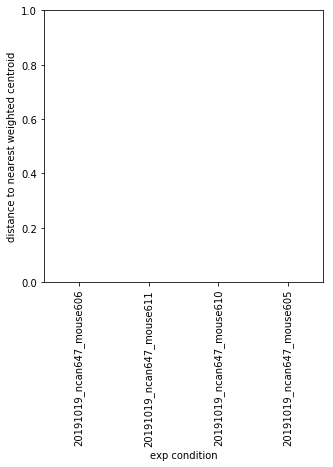

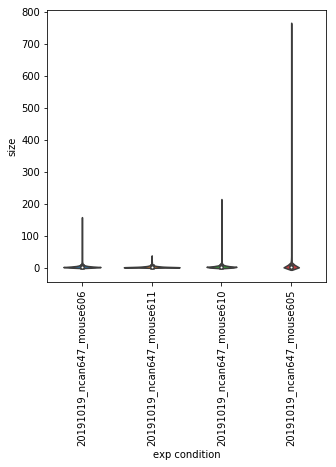

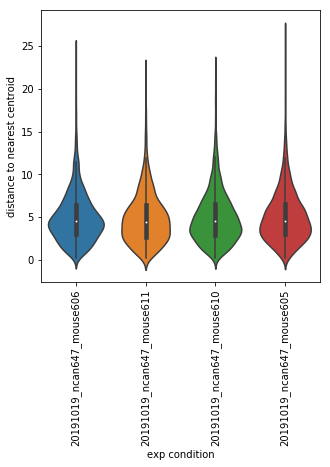

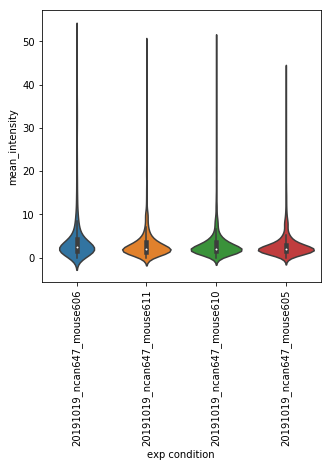

In [338]:
plt.figure(figsize=(5,5))
sns.violinplot(y="distance to nearest weighted centroid",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.violinplot(y="size",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.violinplot(y="distance to nearest centroid",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.violinplot(y="mean_intensity",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

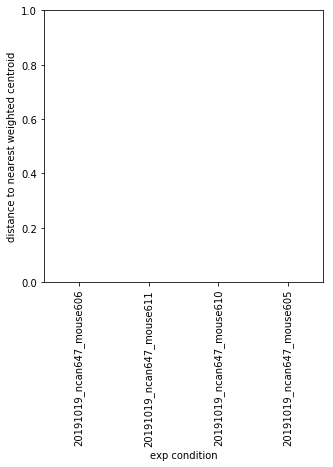

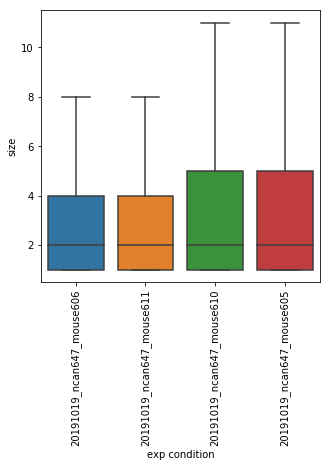

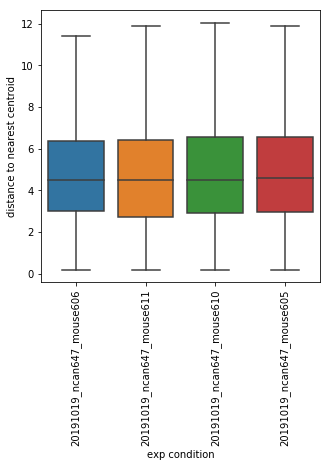

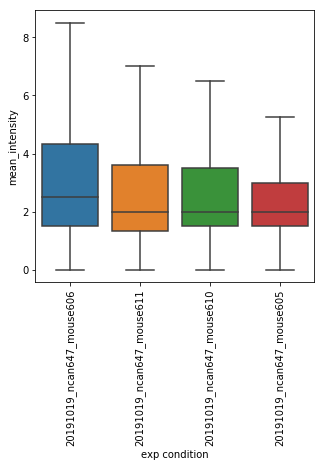

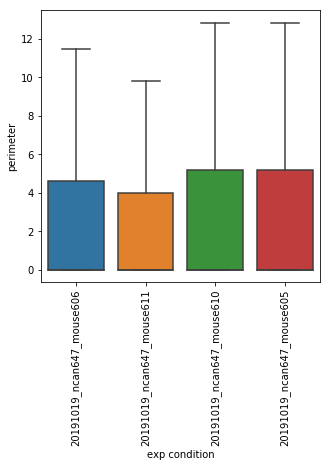

In [345]:
plt.figure(figsize=(5,5))
sns.boxplot(y="distance to nearest weighted centroid",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.boxplot(y="size",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.boxplot(y="distance to nearest centroid",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.boxplot(y="mean_intensity",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)

plt.figure(figsize=(5,5))
sns.boxplot(y="perimeter",x="exp condition",data=df_ecm,showfliers=False)
plt.xticks(rotation=90)